# Bay Wheels Trip Data Exploration
## by Akash Karan

## Investigation Overview

> This dataset contains data from Bike sharing service Bay Wheels fromerly known as Ford Go Bike. This visualization primarily focuses on finding the trends and patterns in trips and customer in a year of 2019.


## Dataset Overview

> This dataset is from official Bay Wheels site by month and then combined for yearly analysis.
The dataset has total of 2506983 records and 15 features with information of user types and information about there trips.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
file_name = 'baywheels_tripdata_2019_clean.csv'
df = pd.read_csv(file_name)

## Number of rides taken each month

Rental service used changes from month to month with most used count in july to the list in december.

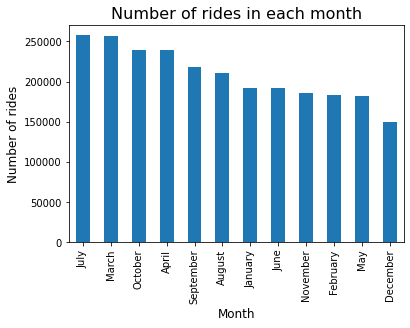

In [3]:
per_month = df.groupby('month')['month','bike_id'].count().sort_values('bike_id', ascending=False)
per_month.month.plot(kind='bar');
plt.xlabel('Month', fontsize=12);
plt.ylabel('Number of rides', fontsize=12);
plt.title('Number of rides in each month', fontsize=16);

## Types of user taking the rides

Around 80% of the user base using the bikes is subscriber of the Bay wheels rental service.

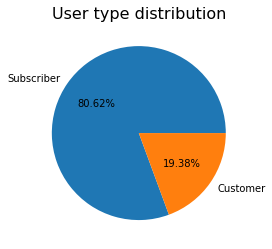

In [4]:
user_type = df.groupby('user_type')['user_type','bike_id'].count().sort_values('bike_id', ascending=False)
user_type.user_type.plot(kind='pie', autopct='%1.2f%%');
plt.title('User type distribution', fontsize=16);
plt.ylabel(None);

## Relationship between day of the week and type of user for trips

There is drop in count for subscribers on Saturday and Sunday using the bikes.
So our graph asuggest that there is a possibility that most of the subscribers are using rides as their commute to work.


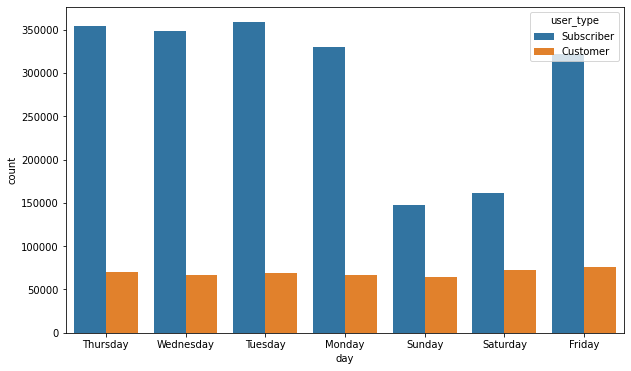

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x ='day', hue = "user_type");

## Trip duration between different user types on different days of the week

Average trip duration for customers is more than that of subscriber even though the number of subscribers taking the rides are more as we saw in earlier graphs.

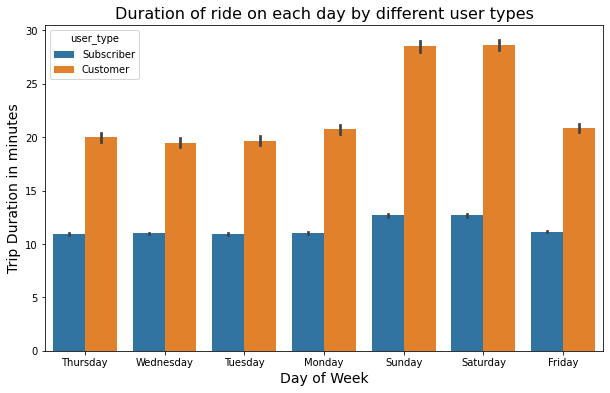

In [8]:
y_co = df.duration_sec/60
plt.figure(figsize=(10,6));
sns.barplot(data=df, x='day', y=y_co, hue='user_type');
plt.xlabel('Day of Week', fontsize=14);
plt.ylabel('Trip Duration in minutes', fontsize=14);
plt.title('Duration of ride on each day by different user types', fontsize=16);